<a href="https://colab.research.google.com/github/FelipeGonzalezGarrido/Coding-Dojo/blob/main/2.%20Machine%20Learning/Semana%202%20-%20Regression%20Models/Semana_2_Primer_modelo_regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount ("/content/drive")

Mounted at /content/drive


# La pregunta es
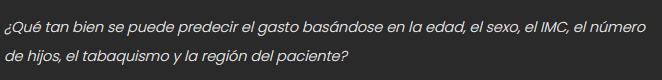

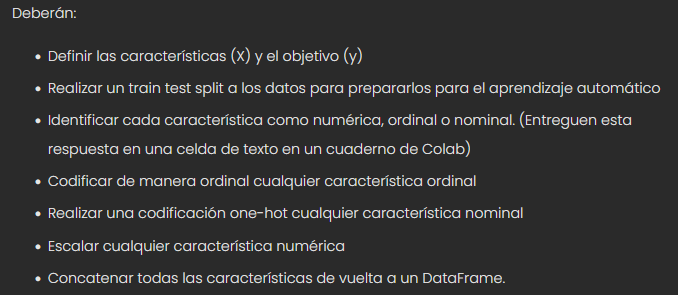

Librerias a utilizar

In [ ]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [ ]:
filename = "/content/drive/MyDrive/Data CodingDojo/insurance.csv"
df = pd.read_csv(filename)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Preparacion de datos

caracteristicas X y vector objetivo y

In [ ]:
y = df["charges"]

X = df.drop(columns="charges")

Modelo de validacion 

train_test_split

el cual separa la matriz de caracteristica y vector objetivo


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [ ]:
X_train.head()

,age,sex,bmi,children,smoker,region
693,24,male,23.655,0,no,northwest
1297,28,female,26.510,2,no,southeast
634,51,male,39.700,1,no,southwest
1022,47,male,36.080,1,yes,southeast
178,46,female,28.900,2,no,southwest


Caracteristica numerica: "bmi" , "children","age"

Caracteristicas nominales: "sex", "smoker", "region" 

ya que sus valores representan diferentes clases y no estan ordenados.


# Selector de columna para codificacion one-hot y numerica

In [ ]:
cat_selector = make_column_selector(dtype_include = "object")
num_selector = make_column_selector(dtype_include = "number")


# Instanciar los transformadores

Scaler  y OHE

In [ ]:
scaler = StandardScaler()

ohe = OneHotEncoder(handle_unknown = "ignore")

# Emparejar el transofmrador con las columnas

In [ ]:
num_tuple = (scaler, num_selector)

cat_tuple = (ohe, cat_selector)

# Instanciar columnstransformer

In [ ]:
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder="passthrough")

# encajar el transformador

In [ ]:
col_transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f81b52801f0>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f81b5280250>)])

In [ ]:
X_train_processed = col_transformer.transform(X_train)
X_test_processed = col_transformer.transform(X_test)

In [ ]:
X_train_processed.shape

(1003, 11)

#Ejercicio Semana 2

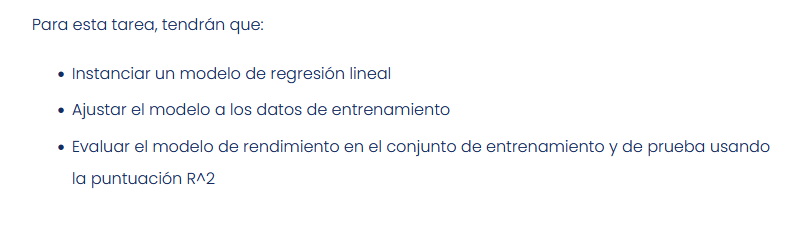

# Instanciar un modelo de regresion lineal

In [ ]:
#Importar modelo
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
#Instanciar modelo
reg = LinearRegression()

In [ ]:
#Ajustar a datos de entrenamiento
reg.fit(X_train_processed, y_train)

LinearRegression()

In [ ]:
train_score = reg.score(X_train_processed, y_train)
print(train_score)

0.7449555328228536


In [ ]:
test_score = reg.score(X_test_processed, y_test)
print(test_score)

0.7672642952734356
